In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set_theme()
# Create an array with the colors you want to use
colors = ["#2E2D62", "#FF6900", "#00A788", "#1E5DF8", "#E355EC", "#3E863E", "#BE2BBB", "#008AAD", "#005E54", "#C13D33"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.color_palette()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

style_dict = {'axes.facecolor': 'white',
              'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': False,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

sns.set_style("whitegrid", style_dict)

In [ ]:
beauhurst_data = pd.read_csv('beauhurst_company_export_20250909-105453.csv')

In [5]:
beauhurst_data.columns

Index(['Beauhurst URL', 'Company name', 'Companies House ID',
       'Registered name', 'Incorporation date (Companies House)',
       'Alternative establishment date', 'Cessation date',
       'Companies House Status', 'Legal form', 'Country',
       ...
       'Financial Statement 10 - Creditor days',
       'Financial Statement 10 - Debtor days',
       'Financial Statement 10 - Liquidity acid test',
       'Financial Statement 10 - Return on capital employed (%)',
       'Financial Statement 10 - Return on total assets employed (%)',
       'Financial Statement 10 - Current debt ratio',
       'Financial Statement 10 - Total debt ratio',
       'Financial Statement 10 - Stock turnover ratio (%)',
       'Financial Statement 10 - Return on net assets employed (%)',
       'Financial Statement 10 - Exports turnover ratio (%)'],
      dtype='object', length=1776)

In [10]:
# Tracking
# 455 companies Advanced Manufacturing and Comapnies House == Active

df_tracking = beauhurst_data[['Beauhurst URL', 'Tracked status', 'Tracking reasons - Has received equity funding', 'Tracking reasons - Has completed an MBO/MBI', 
                'Tracking reasons - Has received a qualifying loan', 'Tracking reasons - Has attended an accelerator', 
                'Tracking reasons - Is a 10% scaleup', 'Tracking reasons - Is a 20% scaleup', 
                'Tracking reasons - Was spun out of an academic institution', 'Tracking reasons - Has been featured in a high growth list cohort',
                'Tracking reasons - Has received a large innovation grant']]

In [15]:
df_tracking.groupby('Tracked status').sum().T

Tracked status,Ceased tracking,Not tracked,Tracked
Beauhurst URL,https://platform.beauhurst.com/company/pr7ysd/...,https://platform.beauhurst.com/company/3ujjjf/...,https://platform.beauhurst.com/company/juy72x/...
Tracking reasons - Has received equity funding,1,0,118
Tracking reasons - Has completed an MBO/MBI,1,0,16
Tracking reasons - Has received a qualifying loan,2,0,15
Tracking reasons - Has attended an accelerator,1,0,76
Tracking reasons - Is a 10% scaleup,0,0,57
Tracking reasons - Is a 20% scaleup,0,0,39
Tracking reasons - Was spun out of an academic institution,0,0,28
Tracking reasons - Has been featured in a high growth list cohort,2,0,50
Tracking reasons - Has received a large innovation grant,3,0,173


In [19]:
df_tracked = df_tracking.groupby('Tracked status').agg({'Beauhurst URL':'count'})

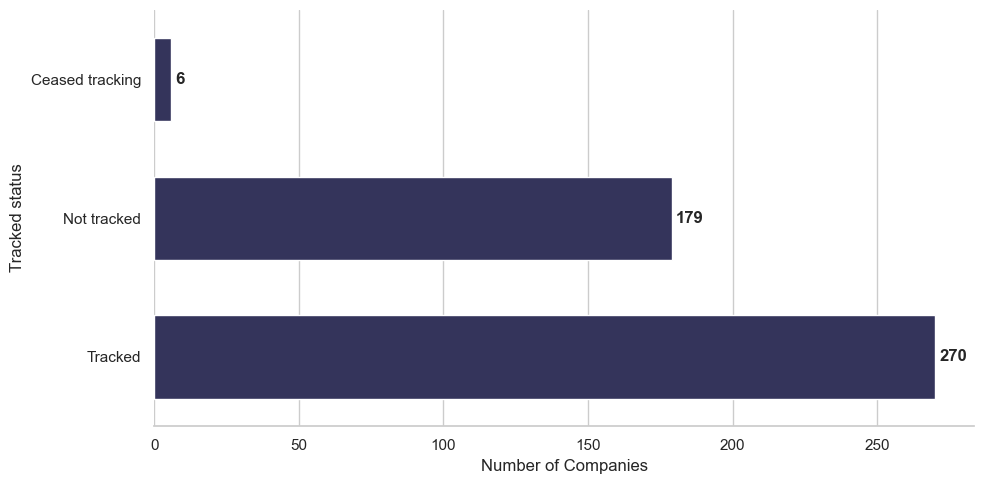

In [28]:
plt.figure(figsize=(10,5))

sns.barplot(data=df_tracked.reset_index(), x='Beauhurst URL', y='Tracked status', width=0.6)

ax = plt.gca()
# Add value labels to the end of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, weight='bold', fontsize=12)

plt.xlabel('Number of Companies')

plt.tight_layout()
plt.show()


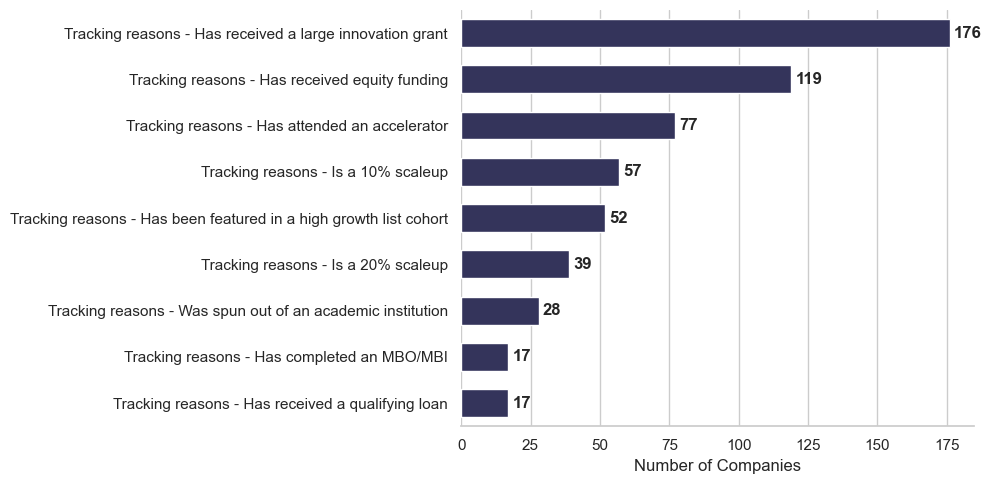

In [38]:
data_bar = df_tracking.drop(columns=['Beauhurst URL', 'Tracked status']).sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))

ax = plt.gca()

sns.barplot(x=data_bar.values, y=data_bar.index, width=0.6, ax=ax)

plt.ylabel('')
plt.xlabel('Number of Companies')

# Add value labels to the end of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, weight='bold', fontsize=12)

plt.tight_layout()
plt.show()

In [69]:
# Select columns containing 'financial statement'
selected_columns = beauhurst_data.copy().loc[:, beauhurst_data.columns.str.contains('Financial statement 1 - ', case=False)]
selected_columns['Beauhurst URL'] = beauhurst_data['Beauhurst URL']

In [70]:
selected_columns.columns = selected_columns.columns.str.replace('Financial Statement 1 - ', '')

In [71]:
selected_columns.columns

Index(['Date of accounts', 'Accounts currency',
       'Number of weeks in the accounting year', 'Accounts are consolidated?',
       'Turnover', 'Pretax profit', 'Profit after tax',
       'Direct exports from country of incorporation', 'Cost of sales',
       'Wages & salaries',
       ...
       'Debtor days', 'Liquidity acid test', 'Return on capital employed (%)',
       'Return on total assets employed (%)', 'Current debt ratio',
       'Total debt ratio', 'Stock turnover ratio (%)',
       'Return on net assets employed (%)', 'Exports turnover ratio (%)',
       'Beauhurst URL'],
      dtype='object', length=102)

In [72]:
selected_columns.isna().sum()

Date of accounts                           12
Accounts currency                          12
Number of weeks in the accounting year     12
Accounts are consolidated?                 12
Turnover                                  333
                                         ... 
Total debt ratio                           12
Stock turnover ratio (%)                  341
Return on net assets employed (%)         333
Exports turnover ratio (%)                341
Beauhurst URL                               0
Length: 102, dtype: int64

In [73]:
selected_columns.dropna(subset='Date of accounts', inplace=True)

In [74]:

selected_columns['Date of accounts'] = pd.to_datetime(selected_columns['Date of accounts'], format='%Y-%m-%d')

# Assuming your datetime column is already converted
selected_columns['financial_year'] = selected_columns['Date of accounts'].apply(
    lambda date: f"{date.year}-{date.year + 1}" if date.month >= 4 else f"{date.year - 1}-{date.year}"
)


In [75]:
selected_columns['Accounts currency'].unique()

array(['GBP'], dtype=object)

In [76]:
selected_columns['Turnover'].sum() / 1e9

np.float64(124.363323583)

In [77]:
selected_columns.groupby('financial_year').agg({'Turnover':'sum'}).sort_index()

,Turnover
financial_year,
2012-2013,3.508000e+09
2022-2023,0.000000e+00
2023-2024,1.090165e+10
2024-2025,1.099537e+11
2025-2026,0.000000e+00


In [83]:
selected_columns.dropna(subset='Turnover').groupby('financial_year').agg({'Beauhurst URL':'count', 'Turnover':'sum'}).sort_index().to_clipboard()

In [80]:
selected_columns

,Date of accounts,Accounts currency,Number of weeks in the accounting year,Accounts are consolidated?,Turnover,Pretax profit,Profit after tax,Direct exports from country of incorporation,Cost of sales,Wages & salaries,...,Liquidity acid test,Return on capital employed (%),Return on total assets employed (%),Current debt ratio,Total debt ratio,Stock turnover ratio (%),Return on net assets employed (%),Exports turnover ratio (%),Beauhurst URL,financial_year
0,2025-03-31,GBP,52.0,True,1.167400e+10,486000000.0,373000000.0,7.578000e+09,1.077500e+10,551000000.0,...,1.010101,13.068029,7.846303,1.078431,1.698911,8.660271,21.176471,64.913483,https://platform.beauhurst.com/company/3ujjjf/,2024-2025
1,2024-12-31,GBP,52.0,True,5.211000e+08,-33400000.0,-53400000.0,0.000000e+00,4.114000e+08,120700000.0,...,1.120984,-9.125683,-6.519617,0.750641,1.628527,25.465362,-17.136993,0.000000,https://platform.beauhurst.com/company/3x7h87/,2024-2025
2,2024-03-31,GBP,52.0,False,1.608000e+07,-5192000.0,-4006000.0,1.434900e+07,1.738800e+07,3849000.0,...,0.358016,-748.126801,-24.829037,-5.594079,-6.786110,49.471393,143.663531,89.235075,https://platform.beauhurst.com/company/juy72x/,2023-2024
3,2024-08-31,GBP,52.0,False,2.851900e+07,1779000.0,1246000.0,0.000000e+00,2.177700e+07,7659000.0,...,1.340708,6.647734,4.254759,1.142304,2.173345,6.010028,13.501821,0.000000,https://platform.beauhurst.com/company/00426047/,2024-2025
4,2023-09-30,GBP,52.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,https://platform.beauhurst.com/company/ubaz98/,2023-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2024-03-31,GBP,52.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,2.387681,NaN,NaN,1.569137,3.252267,NaN,NaN,NaN,https://platform.beauhurst.com/company/zgs74s/,2023-2024
449,2023-12-31,GBP,52.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,29.582173,NaN,NaN,0.034977,0.034977,NaN,NaN,NaN,https://platform.beauhurst.com/company/smmah5/,2023-2024
450,2024-01-31,GBP,52.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,https://platform.beauhurst.com/company/586ipd/,2023-2024
451,2024-03-31,GBP,52.0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,36.114528,NaN,NaN,0.028284,0.028284,NaN,NaN,NaN,https://platform.beauhurst.com/company/nnr2ax/,2023-2024


In [86]:
# Select columns containing 'fundraising'
df_fundraising = beauhurst_data.copy().loc[:, beauhurst_data.columns.str.contains('fundraisings - ', case=False)]
df_fundraising['Beauhurst URL'] = beauhurst_data['Beauhurst URL']

In [88]:
df_fundraising.columns = df_fundraising.columns.str.replace('Fundraisings - ', '')

In [90]:
df_fundraising['Number of fundraisings completed by the company'].sum()

np.float64(399.0)

In [94]:
df_fundraising['Total amount received by the company through fundraisings (GBP)'].replace('(no value)', np.nan).astype(float).sum() / 1e6

np.float64(1866.9986383984185)

In [97]:
selected_columns['GVA'].dropna().sum() / 1e9

np.float64(46.70975401)

In [165]:
data_stage = beauhurst_data['Current Stage of Evolution'].value_counts().reset_index()

data_turnover = beauhurst_data.groupby('Current Stage of Evolution', as_index=False).agg({'Beauhurst URL':'nunique', 'Financial Statement 1 - Turnover':'sum'})

data_turnover['Financial Statement 1 - Turnover'] = data_turnover['Financial Statement 1 - Turnover'] / 1e6

data_turnover.to_clipboard(index=False)

In [98]:
data_fundraising = pd.read_csv('beauhurst_fundraising_export_20250909-135319.csv')


In [104]:
data_fundraising.isna().sum()

Beauhurst company URL                                                0
Beauhurst deal URL                                                   0
Company name                                                         0
Deal date                                                            0
Deal date is an estimate                                             0
Stage of evolution at deal date                                      0
Source(s) (URL)                                                    221
Source(s) (other)                                                  121
Purpose - Capital equipment                                          0
Purpose - Property                                                   0
Purpose - Turnaround                                                 0
Purpose - Working capital                                            0
Purpose - Project finance                                            0
Purpose - Research & Development                                     0
Purpos

In [117]:
# fundraisings over time

data_fundraising['deal_year'] = pd.to_datetime(data_fundraising['Deal date'], format='%Y-%m-%d').dt.year

data_fundraising.groupby('deal_year').agg({'Beauhurst deal URL':'count', 'Announced amount':'sum', 
                                           'Verified investment amount':'sum'}).sort_index()

data_group = data_fundraising.groupby('deal_year').agg({'Beauhurst deal URL':'count', 'Amount raised':'sum'})
data_group['Amount raised (millions)'] = data_group['Amount raised'] / 1e6

Text(0, 0.5, 'Amount Raised (millions GBP)')

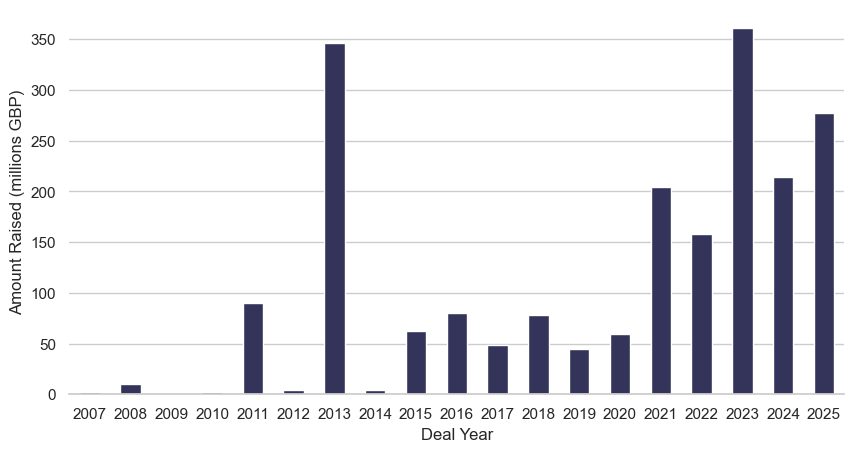

In [121]:
plt.figure(figsize=(10,5))

sns.barplot(data=data_group.reset_index(), x='deal_year', y='Amount raised (millions)', width=0.5)
plt.xlabel('Deal Year')
plt.ylabel('Amount Raised (millions GBP)')


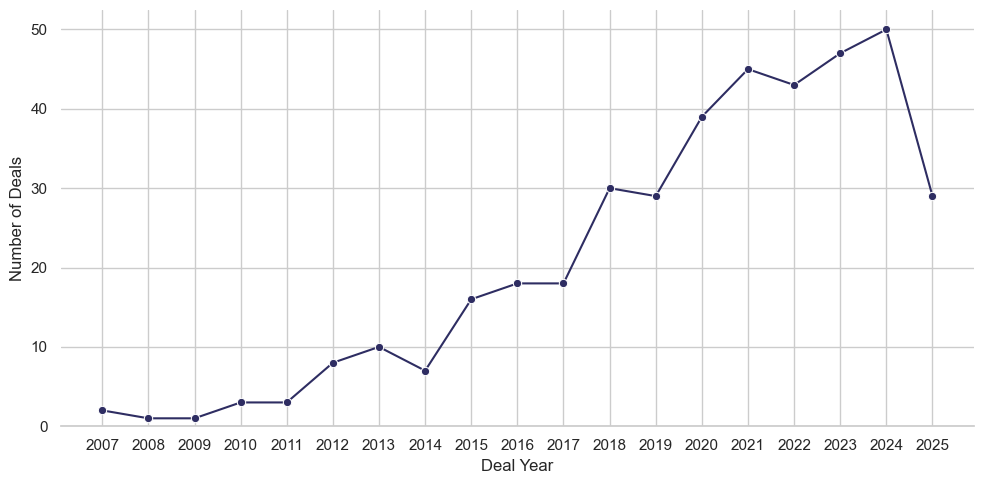

In [125]:
plt.figure(figsize=(10,5))

sns.lineplot(data=data_group.reset_index(), x='deal_year', y='Beauhurst deal URL', marker='o')

plt.ylim(0)
plt.xlabel('Deal Year')
plt.ylabel('Number of Deals')

plt.xticks(data_group.reset_index()['deal_year'])

plt.tight_layout()
plt.show()

In [135]:
data_w_stage = data_fundraising.groupby(['deal_year', 'Stage of evolution at deal date'], as_index=False).agg({'Beauhurst deal URL':'count', 'Amount raised':'sum'})

data_w_stage['Amount raised (millions)'] = data_w_stage['Amount raised'] / 1e6

In [136]:
data_fundraising['Stage of evolution at deal date'].value_counts()

Stage of evolution at deal date
Seed           183
Venture        143
Established     37
Growth          36
Name: count, dtype: int64

In [137]:
data_w_stage

,deal_year,Stage of evolution at deal date,Beauhurst deal URL,Amount raised,Amount raised (millions)
0,2007,Seed,1,1.000000e+06,1.000000
1,2007,Venture,1,8.000000e+05,0.800000
2,2008,Seed,1,1.030000e+07,10.300000
3,2009,Seed,1,1.300000e+06,1.300000
4,2010,Seed,1,3.000000e+04,0.030000
...,...,...,...,...,...
57,2024,Venture,22,9.385591e+07,93.855909
58,2025,Established,7,3.476564e+07,34.765644
59,2025,Growth,3,1.481477e+08,148.147688
60,2025,Seed,7,6.752500e+06,6.752500


Text(0, 0.5, 'Amount Raised (millions GBP)')

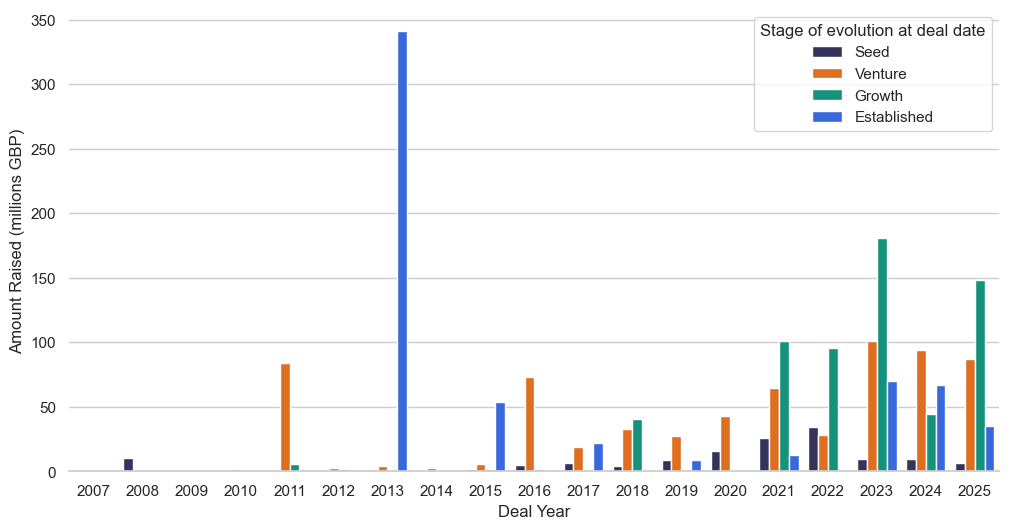

In [142]:
plt.figure(figsize=(12,6))

sns.barplot(data_w_stage, x='deal_year', y='Amount raised (millions)', hue='Stage of evolution at deal date')

plt.xlabel('Deal Year')
plt.ylabel('Amount Raised (millions GBP)')


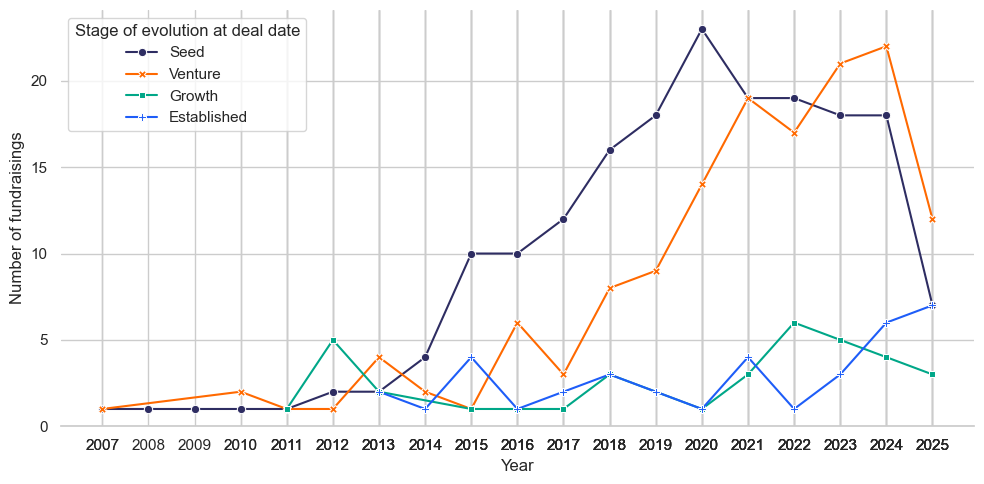

In [148]:
plt.figure(figsize=(10,5))

sns.lineplot(data=data_w_stage, x='deal_year', y='Beauhurst deal URL', hue='Stage of evolution at deal date', style='Stage of evolution at deal date', dashes=False, markers=True)

plt.ylim(bottom=0)
plt.ylabel('Number of fundraisings')
plt.xlabel('Year')

plt.xticks(data_w_stage['deal_year'])

plt.tight_layout()
plt.show()